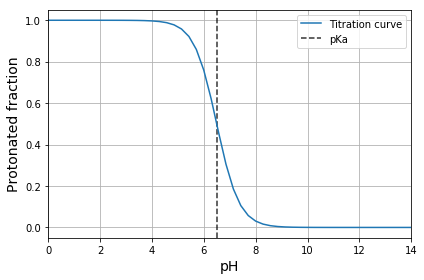

In [3]:
# First we import necessary packages
import numpy as np
import matplotlib.pyplot as plt


# This is form of the Henderson-Hasselbalch equation calculates the protonation degree
# at different pH values, for a given pKa value
def HH(pH,pKa):
    return 1 - 10**(pH-pKa)/(1+10**(pH-pKa))

# Here we define the pKa value
pKa = 6.5

# Here we create the pH scale from 0 to 14, with 50 linearly spaced pH values
pH = np.linspace(0,14,num=50)

# And we plot pH vs protonation degree for both pKa values
plt.plot(pH,HH(pH,pKa), label="Titration curve" )
plt.vlines(pKa,-0.05,1.05,color='k',linestyles='dashed',alpha=0.8, label='pKa')
plt.ylim(-0.05,1.05)
plt.xlim(0,14)
plt.xlabel('pH', fontsize=14)
plt.ylabel('Protonated fraction', fontsize=14)
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()